In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import itertools as it
sns.set_style("white")
%matplotlib inline

---

In [21]:
T = pd.DataFrame(np.array([[.02, .07, .22], [.12, .16 ,.09], [.23, .07, .02]]),
                columns = ["1 Hour", "5 Hours", "10 Hours"],
                index = ["Grade 100", "Grade 80", "Grade 40"])

In [22]:
T

,1 Hour,5 Hours,10 Hours
Grade 100,0.02,0.07,0.22
Grade 80,0.12,0.16,0.09
Grade 40,0.23,0.07,0.02


----

In [23]:
T = pd.DataFrame(np.array([[.02, .07, .22], [.12, .16 ,.09], [.23, .07, .02]]),
                columns = ["X = 1", "X = 5", "X = 10"],
                index = ["Y = 100", "Y = 80", "Y = 40"])

In [24]:
T

,X = 1,X = 5,X = 10
Y = 100,0.02,0.07,0.22
Y = 80,0.12,0.16,0.09
Y = 40,0.23,0.07,0.02


---

In [25]:
T = pd.DataFrame(np.array([[.05, .05, .2], [.05, .1 ,.1], [.20, .15, .1]]),
                columns = ["X = 1", "X = 2", "X = 3"],
                index = ["Y = 0", "Y = 1", "Y = 2"])

In [26]:
T.sum(0)

X = 1    0.3
X = 2    0.3
X = 3    0.4
dtype: float64

In [34]:
T.sum(1)

Y = 0    0.30
Y = 1    0.25
Y = 2    0.45
dtype: float64

In [38]:
VX = 0.3*(1 - EX)**2 + 0.3*(2 - EX)**2 + 0.4*(3 - EX)**2

0.68999999999999995

In [40]:
VY = 0.3*(0 - EY)**2 + 0.25*(1 - EY)**2 + 0.45*(2 - EY)**2
VY

0.72750000000000004

In [35]:
EX = np.round(np.sum(T.sum(0)*np.array([1,2,3])),2)

In [36]:
EY = np.round(np.sum(T.sum(1)*np.array([0,1,2])),2)

In [41]:
c = 0
for i,x in zip([0,1,2],[1,2,3]):
    for j,y in zip([0,1,2], [0,1,2]):
        c += T.iloc[i,j]*(x - EX)*(y - EY)

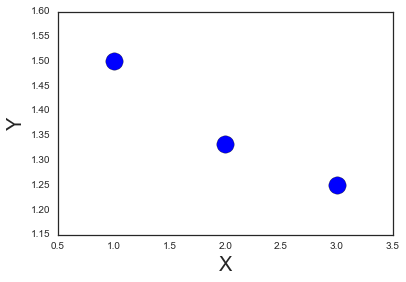

In [48]:
EY1 = 1/6*0 + 1/6*1 + 2/3*2
EY2 = 1/6*0 + 1/3*1 + 1/2*2
EY3 = 1/2*0 + 1/4*1 + 2/4*2
plt.scatter([1,2,3], [EY1, EY2, EY3], s = 300)
plt.xlabel("X", fontsize= 20)
plt.ylabel("Y", fontsize= 20)
plt.savefig("sol")

In [106]:
for i in [0,1,2]:
    for j in [1,2,3]:
        print("+",T.ix["Y = %d" % i, "X = %d" % j],"\\times(",i,"-",EY,")","\\times(",j,"-",EX,")")

+ 0.05 \times( 0 - 1.15 ) \times( 1 - 2.1 )
+ 0.05 \times( 0 - 1.15 ) \times( 2 - 2.1 )
+ 0.2 \times( 0 - 1.15 ) \times( 3 - 2.1 )
+ 0.05 \times( 1 - 1.15 ) \times( 1 - 2.1 )
+ 0.1 \times( 1 - 1.15 ) \times( 2 - 2.1 )
+ 0.1 \times( 1 - 1.15 ) \times( 3 - 2.1 )
+ 0.2 \times( 2 - 1.15 ) \times( 1 - 2.1 )
+ 0.15 \times( 2 - 1.15 ) \times( 2 - 2.1 )
+ 0.1 \times( 2 - 1.15 ) \times( 3 - 2.1 )


$\begin{align}
Cov(X,Y) 
&= 0.05 \times( 0 - 1.15 ) \times( 1 - 2.1 ) \\
&+ 0.05 \times( 0 - 1.15 ) \times( 2 - 2.1 ) \\
&+ 0.2 \times( 0 - 1.15 ) \times( 3 - 2.1 ) \\
&+ 0.05 \times( 1 - 1.15 ) \times( 1 - 2.1 ) \\
&+ 0.1 \times( 1 - 1.15 ) \times( 2 - 2.1 ) \\
&+ 0.1 \times( 1 - 1.15 ) \times( 3 - 2.1 ) \\
&+ 0.2 \times( 2 - 1.15 ) \times( 1 - 2.1 ) \\
&+ 0.15 \times( 2 - 1.15 ) \times( 2 - 2.1 ) \\
&+ 0.1 \times( 2 - 1.15 ) \times( 3 - 2.1 ) \\
\end{align}$

$$Cov(X,Y) = \sum_{\text{all combinations of }X,Y} (X - EX) \times (Y - EY) \times p_{XY}(x,y)$$

In [45]:
pd.DataFrame(T.sum(), columns = ["$p_X$"]).T

,X = 1,X = 2,X = 3
$p_X$,0.3,0.3,0.4


In [53]:
pd.DataFrame(T.ix["Y = 2"]/T.sum(), columns = ["$p_{Y|X}(y,10)$"]).T

,X = 1,X = 2,X = 3
"$p_{Y|X}(y,10)$",0.666667,0.5,0.25


----

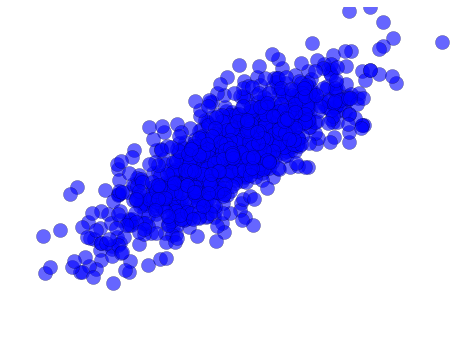

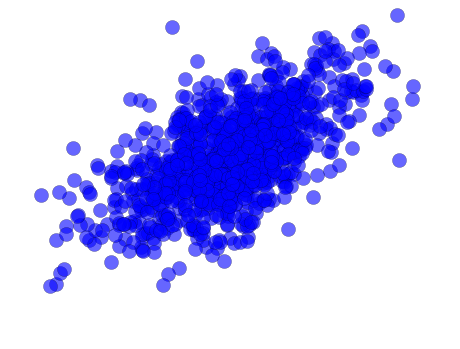

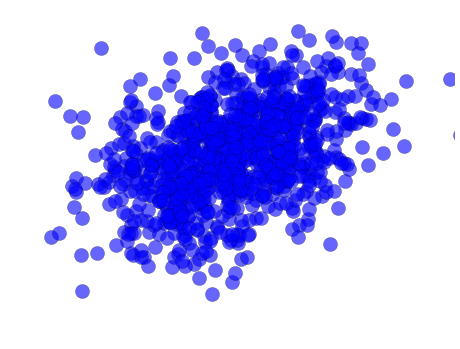

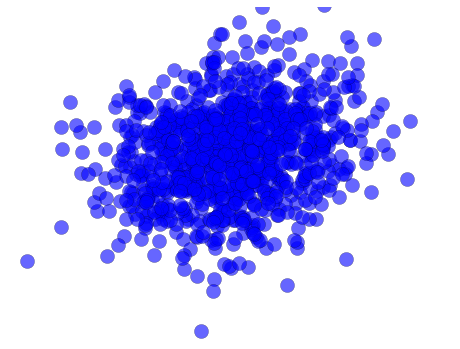

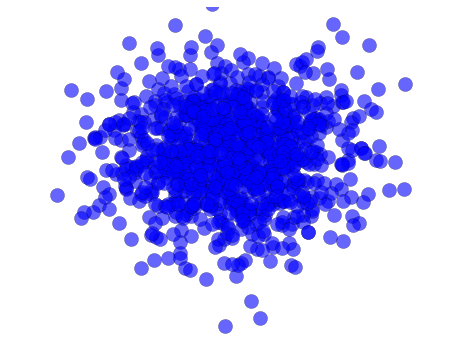

In [72]:
for c in [4,3,2,1,0]:
    cov = [[5,c],[c,5]]
    mu = [2,3]
    x = np.random.multivariate_normal(mu, cov, size = 1000)
    fig, ax = plt.subplots(1, figsize = (8, 6))
    ax.scatter(x[:,0], x[:,1], s = 200, alpha = 0.6)
    ax.set_xlim((-6,10))
    ax.set_ylim((-6,10))
    sns.despine(left = True, bottom = True)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.savefig("cov{}.png".format(c))

----

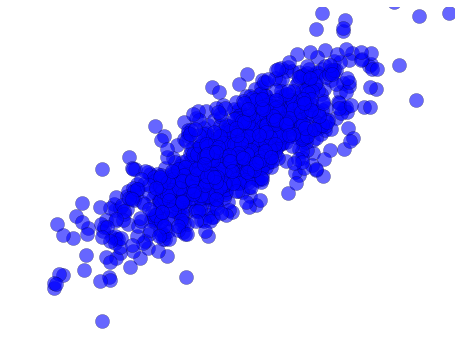

In [74]:
cov = [[5,4],[4,5]]
mu = [2,3]
x = np.random.multivariate_normal(mu, cov, size = 1000)
fig, ax = plt.subplots(1, figsize = (8, 6))
ax.scatter(x[:,0], x[:,1], s = 200, alpha = 0.6)
ax.set_xlim((-6,10))
ax.set_ylim((-6,10))
ax.scatter()
sns.despine(left = True, bottom = True)
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("cov_with_mean.png".format(c))

Cov(X, Y) = E\_{XY}[(X - E_X[X])(Y - E_Y[Y])]

----

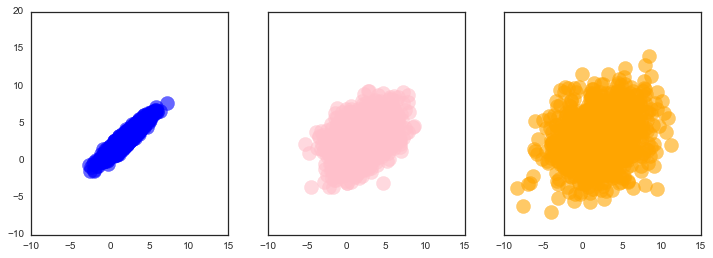

In [119]:
fig, ax = plt.subplots(1,3, figsize = (12, 4), sharex = True, sharey = True)
cs = ["blue", "pink", "orange"]
for k,v in enumerate([2.1, 5, 10]):
    cov = [[v,2],[2,v]]
    mu = [2,3]
    x = np.random.multivariate_normal(mu, cov, size = 1000)
    ax[k].scatter(x[:,0], x[:,1], s = 200, alpha = 0.6, color = cs[k])
    #ax[k].set_xlim((-8,12))
    #ax[k].set_ylim((-8,12))
    #sns.despine(left = True, bottom = True)
    #ax[k].set_xticks([])
    #ax[k].set_yticks([])
fig.savefig("covs.png".format(c))

---

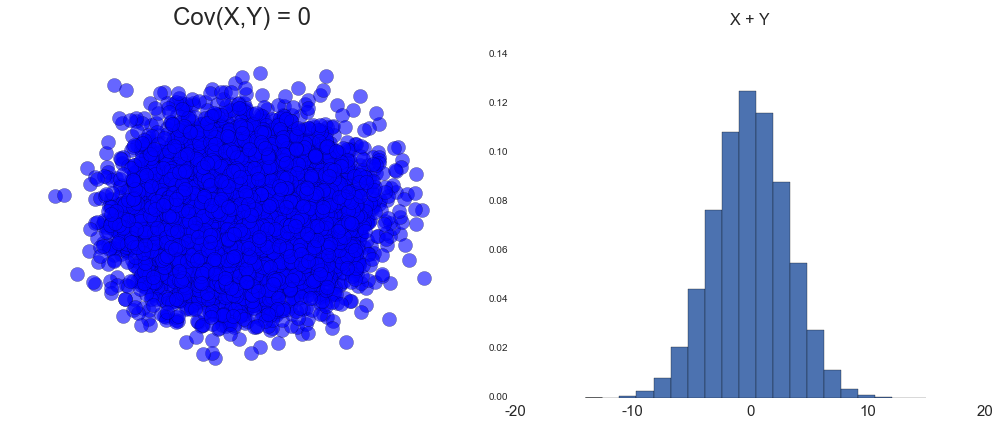

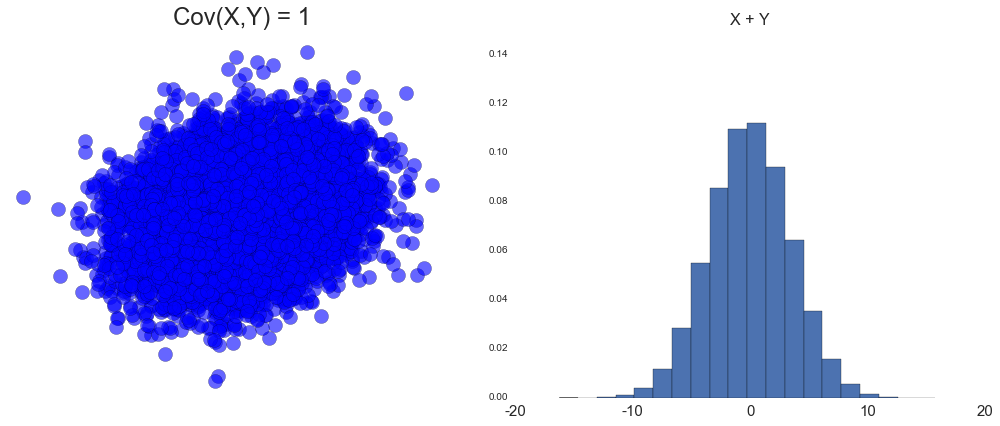

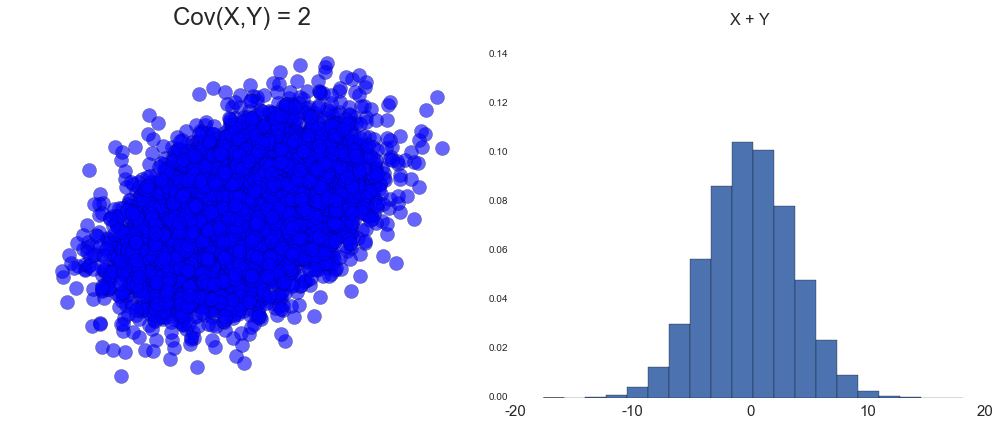

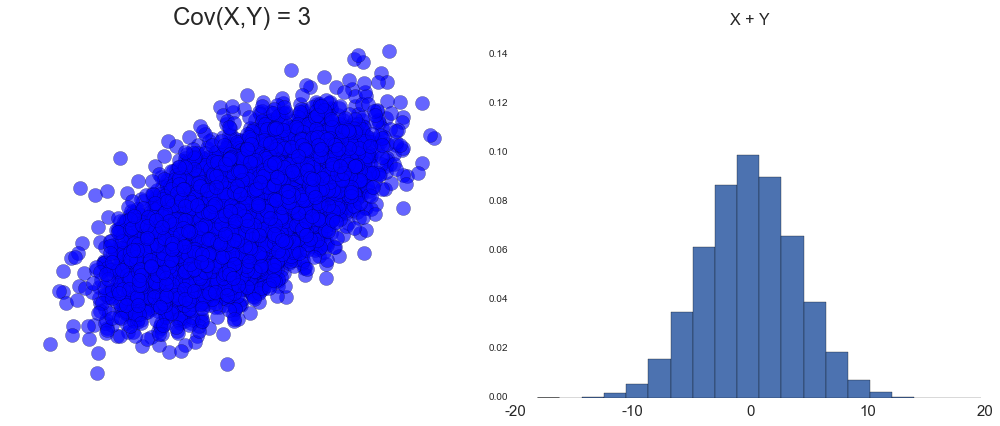

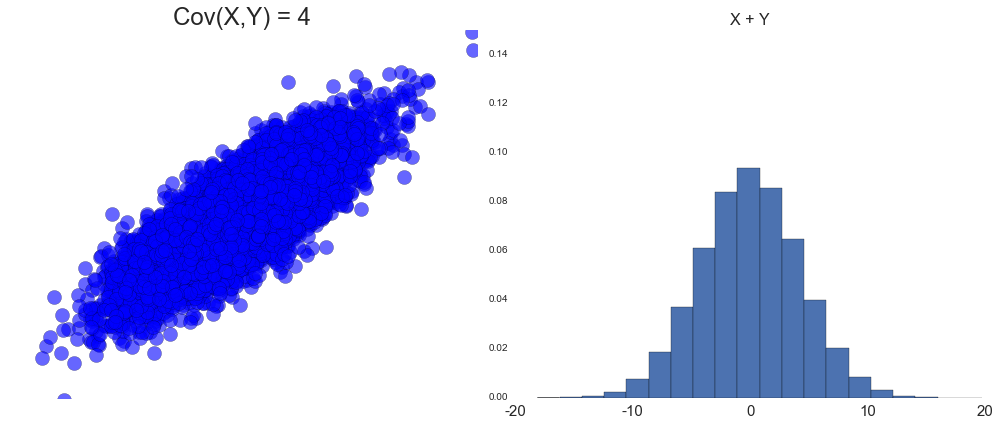

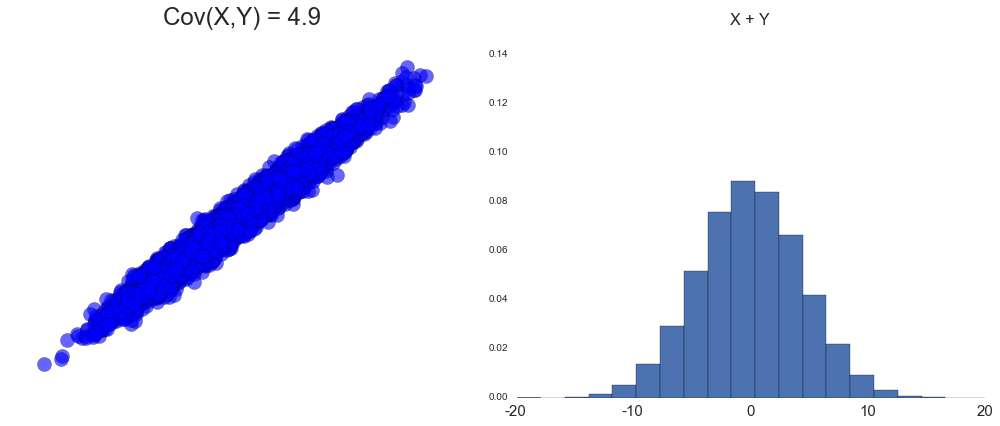

In [42]:
c = 0
for c in [0,1,2,3,4,4.9]:
    cov = [[5,c],
           [c,5]]
    mu = [0,0]
    x = np.random.multivariate_normal(mu, cov, size = 500000)
    fig, ax = plt.subplots(1, 2, figsize = (14, 6))
    ax[0].scatter(x[:10000,0], x[:10000,1], s = 200, alpha = 0.6)
    ax[0].set_xlim((-10,10))
    ax[0].set_ylim((-10,10))
    ax[0].set_yticks([])
    ax[0].set_xticks([])
    ax[0].set_title("Cov(X,Y) = {}".format(c), fontsize = 24)
    

    z = x.sum(1)
    ax[1].hist(z, bins = 20, normed = True)
    ax[1].set_xlim((-20,20))
    ax[1].set_xticks([-20,-10,0,10,20])
    ax[1].set_xticklabels([-20,-10,0,10,20], fontsize = 15)
    ax[1].set_title("X + Y", fontsize = 16)
    ax[1].set_ylim((0,0.15))
    

    sns.despine(left = True, bottom = True)
    fig.tight_layout()

    fig.savefig("cov_sum_{}.png".format(c))

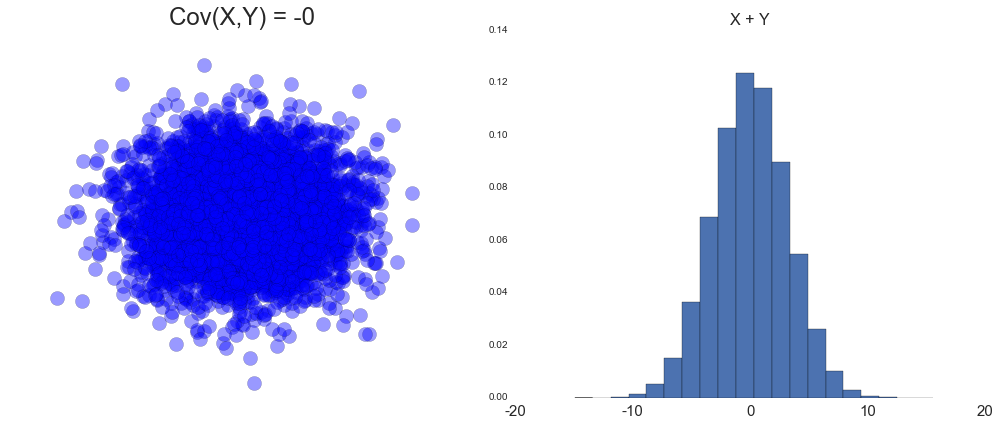

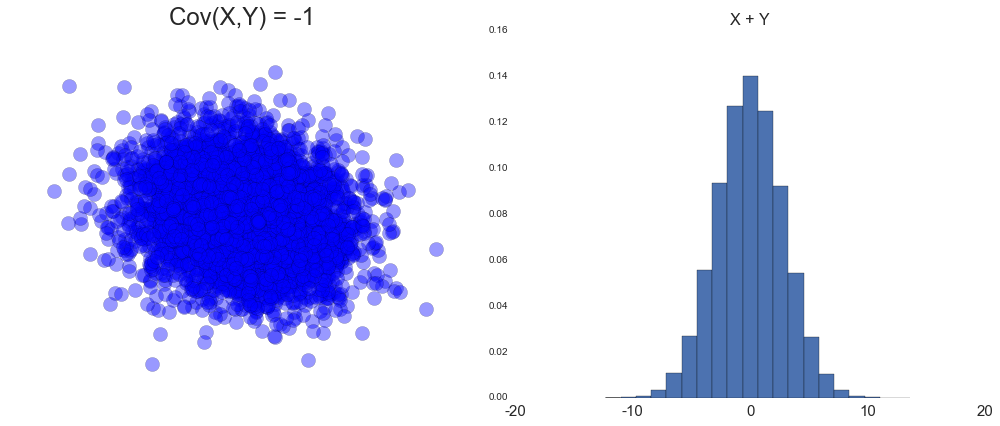

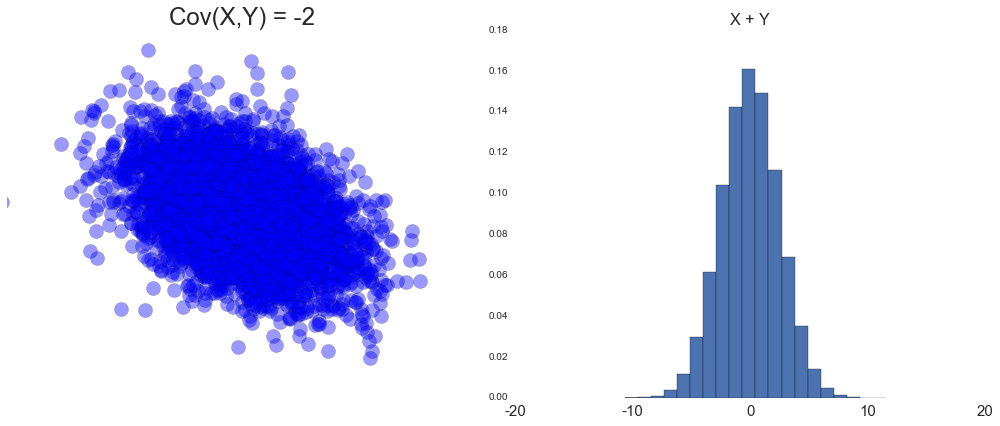

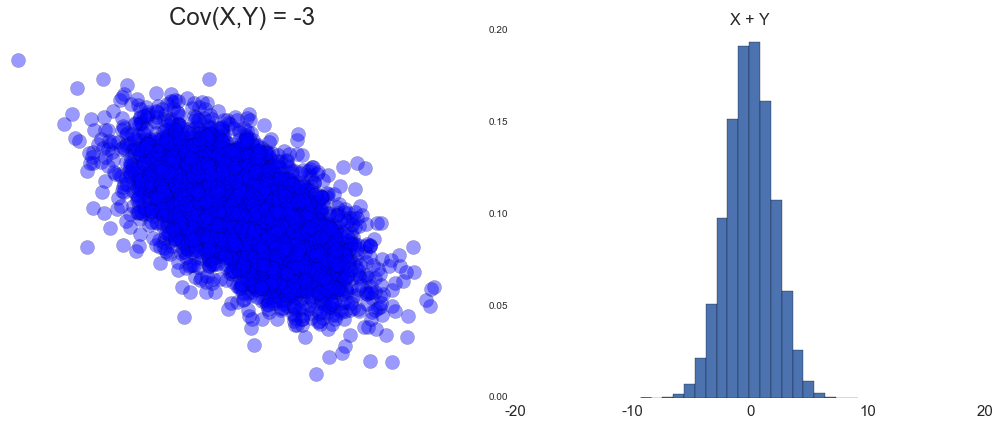

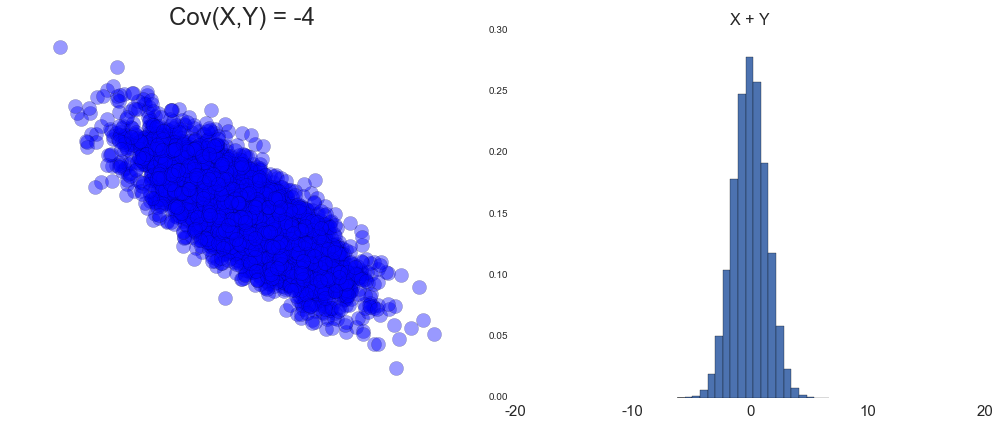

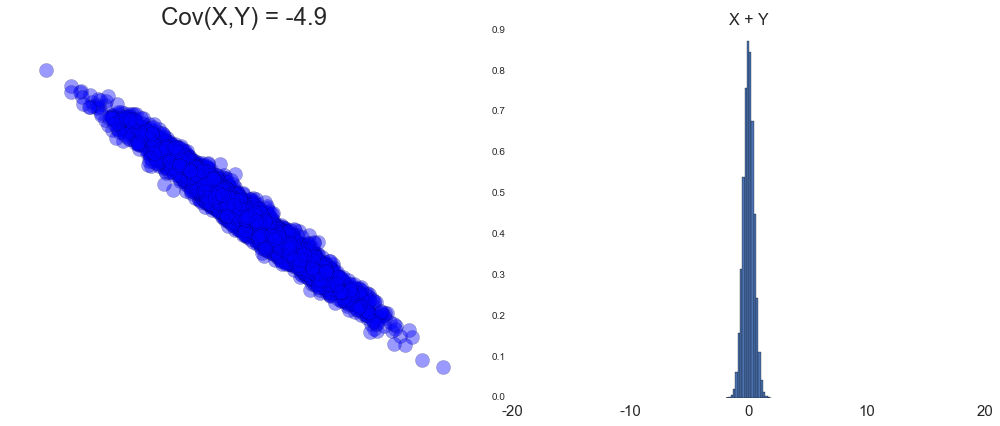

In [46]:
c = 0
for c in [0,1,2,3,4,4.9]:
    cov = [[5,-c],
           [-c,5]]
    mu = [0,0]
    x = np.random.multivariate_normal(mu, cov, size = 500000)
    fig, ax = plt.subplots(1, 2, figsize = (14, 6))
    ax[0].scatter(x[:5000,0], x[:5000,1], s = 200, alpha = 0.4)
    ax[0].set_xlim((-10,10))
    ax[0].set_ylim((-10,10))
    ax[0].set_yticks([])
    ax[0].set_xticks([])
    ax[0].set_title("Cov(X,Y) = -{}".format(c), fontsize = 24)
    

    z = x.sum(1)
    ax[1].hist(z, bins = 20, normed = True)
    ax[1].set_xlim((-20,20))
    ax[1].set_xticks([-20,-10,0,10,20])
    ax[1].set_xticklabels([-20,-10,0,10,20], fontsize = 15)
    ax[1].set_title("X + Y", fontsize = 16)
    #ax[1].set_ylim((0, 1))
    

    sns.despine(left = True, bottom = True)
    fig.tight_layout()

    fig.savefig("cov_sum_b{}.png".format(c))

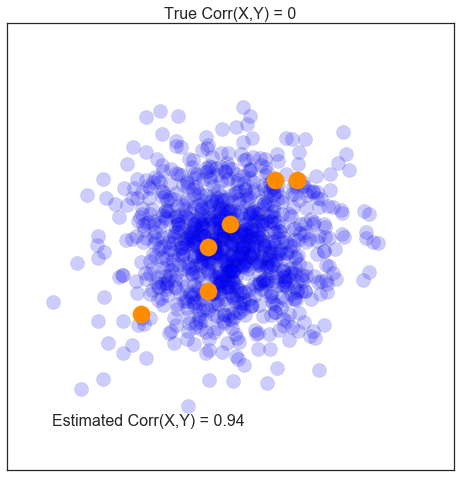

In [71]:
cov = [[5,0], [0,5]]
mu = [0,0]
data = np.array([[3,3], [2,3], [-1,-2], [-4,-3], [0,1], [-1,0]])

x = np.random.multivariate_normal(mu, cov, size = 1000)
fig, ax = plt.subplots(1, figsize = (8,8))
ax.scatter(x[:,0], x[:,1], s = 200, alpha = 0.2)
ax.scatter(data[:,0], data[:,1], s = 300, alpha = 1, color = "darkorange")

ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("True Corr(X,Y) = 0", fontsize = 16)
ax.text(-8, -8, "Estimated Corr(X,Y) = 0.94", fontsize = 16)
fig.savefig("spurious_correlation.png")

In [ ]:
cov = [[5, 3], [3, 5]]
mu = [0,0]
x = np.random.multivariate_normal(mu, cov, size = 1000)
fig, ax = plt.subplots(1, figsize = (8,8))
ax.scatter(x[:,0], x[:,1], s = 200, alpha = 0.2)
ax.scatter(data[:,0], data[:,1], s = 300, alpha = 1, color = "darkorange")

ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("True Corr(X,Y) = 0", fontsize = 16)
ax.text(-8, -8, "Estimated Corr(X,Y) = 0.94", fontsize = 16)
fig.savefig("confounded_correlation.png")

---

In [4]:
y1 = np.random.normal(5, 1, size = 20)
y2 = np.random.normal(8, 2, size = 30)
data = np.hstack([y1, y2])

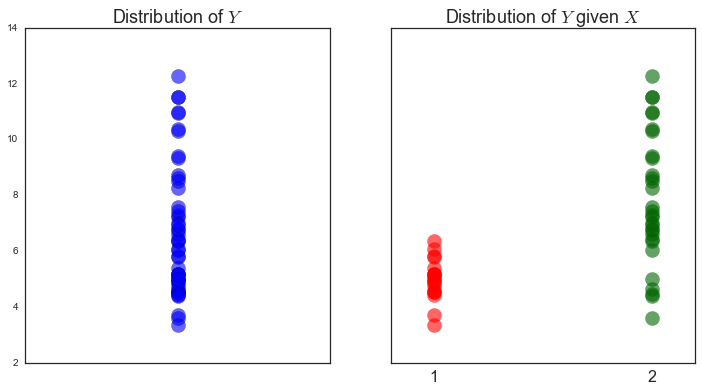

In [5]:
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey = True)
ax[0].scatter([1.5]*len(data), data, s = 200, alpha = 0.6)
ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_title("Distribution of $Y$", fontsize = 18)

ax[1].scatter([1]*len(y1), y1, s = 200, alpha = 0.6, color = "red")
ax[1].scatter([2]*len(y2), y2, s = 200, alpha = 0.6, color = "darkgreen")
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels([1, 2], fontsize = 16)
ax[1].set_title("Distribution of $Y$ given $X$", fontsize = 18)

fig.savefig("mean1")

/Users/vitorhadad/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


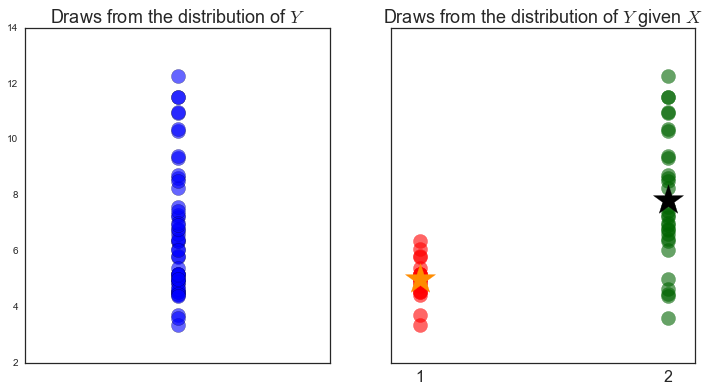

In [18]:
fig, ax = plt.subplots(1,2, figsize = (12,6), sharey = True)
ax[0].scatter([1.5]*len(data), data, s = 200, alpha = 0.6)
ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_title("Draws from the distribution of $Y$", fontsize = 18)

ax[1].scatter([1]*len(y1), y1, s = 200, alpha = 0.6, color = "red")
ax[1].scatter([2]*len(y2), y2, s = 200, alpha = 0.6, color = "darkgreen")
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels([1, 2], fontsize = 16)
ax[1].set_title("Draws from the distribution of $Y$ given $X$", fontsize = 18)


ax[1].scatter(1, np.mean(y1), marker = "*", color = "darkorange", s = 1000)
ax[1].scatter(2, np.mean(y2), marker = "*", color = "black", s = 1000)

ax[1].legend()

fig.savefig("mean2")